# OSSEN Tutorial-Elsa Arcaute: Street Network and Accessibility

Authors:
- Elsa Arcaute (e.arcaute@ucl.ac.uk)
- Xiuning Zhang (xiuning.zhang.23@ucl.ac.uk)
- Miao Zeng (ucbqmz7@ucl.ac.uk)

## Introduction
This tutorial is designed to introduce you to the analysis of urban networks using Python. The tutorial is divided into  parts:
1. **Street Network**: this part show you how to represent and analysis the street system as a network using the OSMnx library. It help you to download and analyze spatial data from OpenStreetMap. Besides the basic statistic description of the street networks, we will then apply percolation analysis to the street network to find spatial clusters on different scales.
2. **Accessibility Modelling**: Using the R5Py library to calculate the travel time matrix and analyze the accessibility of urban amenities in Oxford.

In [1]:
# Install the packages used in the first part of the tutorial
!pip install networkx
!pip install osmnx

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Install the packages used in the third part of the tutorial
!pip install r5py
!pip install mapclassify

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [31]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="pandas.core.frame")

## Part I Street Network
The 1st part of this tutorial, we will learn one specific kind of urban networks —— the street networks:
1. Understand how to represent the street system as network.
2. Learn to use the OSMnx library.

### 1.Represent Street Network as Graph
![street network representation](street_networks.png)

from: [Street Network Studies: from Networks to Models and their Representations](https://link.springer.com/article/10.1007/s11067-018-9427-9)

###  2.the OSMnx library
It is a python library to help you download and analyze spatial data from OpenStreetMap.
https://osmnx.readthedocs.io/en/stable/

OSMnx is built on top of GeoPandas, and Networkx:
* Downloads and creates a networkx graph ofstreet networks or other infrastructure networks
    * Automatically cleans(topologically corrects) the network for you.
* Download any other spatial geometries (buildings, POI's, place **boundaries**)

#### **Step 1** Install & Import Libraries

In [3]:
import networkx as nx
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
# from osgeo import gdal

#### **Step 2** Acquire Street Network

In [4]:
# We can build a graph by giving the name of the place
G1 = ox.graph_from_place('Oxford, England, United Kingdom', network_type='drive')
print(type(G1))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


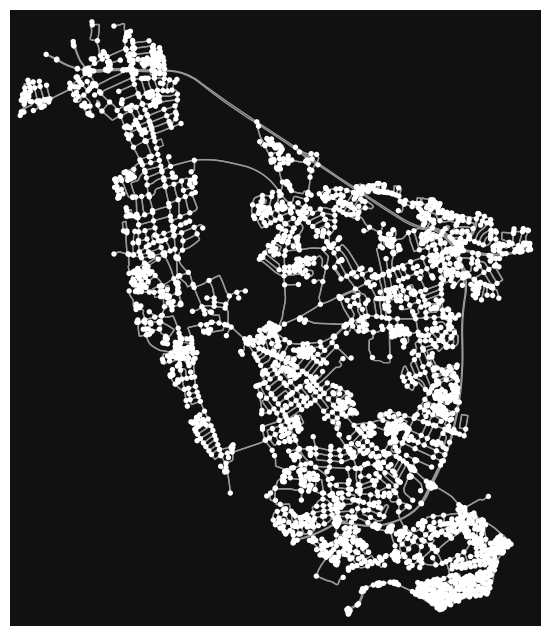

In [5]:
fig, ax = ox.plot_graph(G1)


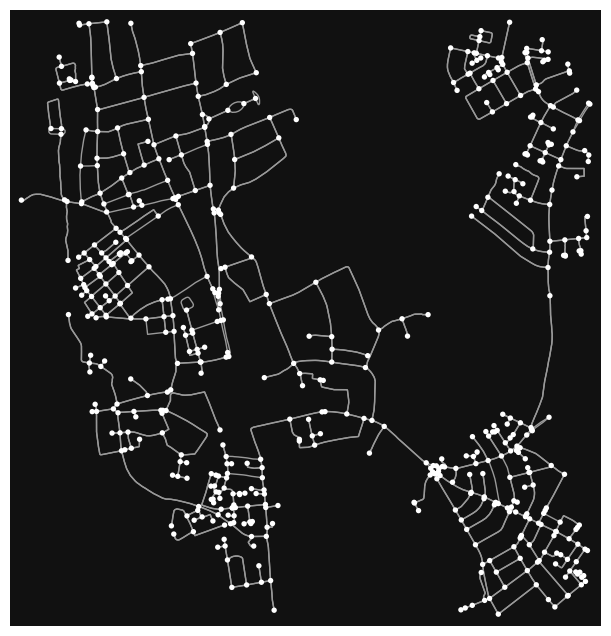

In [6]:
# We can also build a graph by giving the coordinates and a radius
# ucl = (51.5245593,-0.1358805)

Uni_Oxford = (51.7570,-1.2545)
radius = 1500 #meters
G = ox.graph_from_point(Uni_Oxford, dist=radius, network_type='drive')
fig, ax = ox.plot_graph(G)

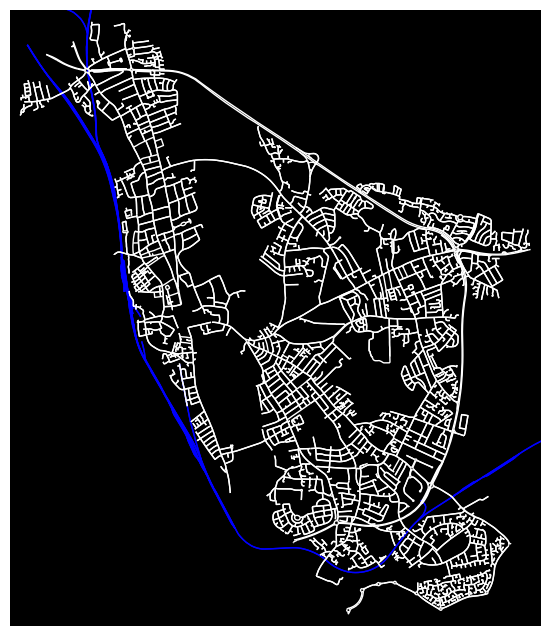

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [7]:
# We can also get other infrastructure networks
# change the overpass query to meet the new style 'New York, NY, USA'
G = ox.graph_from_place('Oxford, England, United Kingdom',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        custom_filter='["railway"]')

# Plot the railway network
fig, ax = ox.plot_graph(G, node_size=0, edge_color='blue', edge_linewidth=1, bgcolor='black', show=False, close=False)

# Plot the road network on top of the same figure
ox.plot_graph(G1, node_size=0, edge_color='w', edge_linewidth=1, bgcolor='black', ax=ax, show=True)

#### **Step 3** Understanding the Data Structure & Get some Basic Stats

In [8]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G1)
stats

{'n': 3422,
 'm': 7590,
 'k_avg': 4.436002337814144,
 'edge_length_total': 667039.414000002,
 'edge_length_avg': 87.88398076416364,
 'streets_per_node_avg': 2.3839859731151374,
 'streets_per_node_counts': {0: 0, 1: 1112, 2: 31, 3: 2132, 4: 147},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.3249561659848042,
  2: 0.009059029807130333,
  3: 0.6230274693161894,
  4: 0.042957334891876094},
 'intersection_count': 2310,
 'street_length_total': 361338.3610000006,
 'street_segment_count': 4065,
 'street_length_avg': 88.89012570725723,
 'circuity_avg': 1.0605517834795488,
 'self_loop_proportion': 0.004920049200492005}

In [9]:
# calculate betweenness with a digraph of G (ie, no parallel edges)
bc = nx.betweenness_centrality(ox.convert.to_digraph(G1), weight="length")

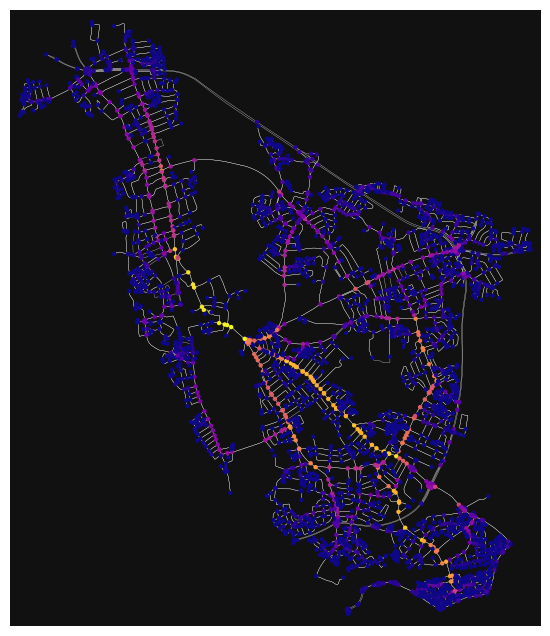

In [10]:
# add the betweenness centraliy values as new node attributes, then plot
nx.set_node_attributes(G1, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(G1, "bc", cmap="plasma")
fig, ax = ox.plot_graph(
    G1,
    node_color=nc,
    node_size=10,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="w",
)

#### **Step 4** Acquire Other Spatial Data

In [11]:
# get building footprints for the University of Oxford
buildings = ox.geometries_from_point(Uni_Oxford, dist=radius,tags={'building':True})
# get amenities for the University of Oxford
amenities = ox.geometries_from_point(Uni_Oxford,dist=radius,tags={'amenity':True, 'geometry':'point'})


C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_18400\3663990541.py:2: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = ox.geometries_from_point(Uni_Oxford, dist=radius,tags={'building':True})
C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_18400\3663990541.py:4: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  amenities = ox.geometries_from_point(Uni_Oxford,dist=radius,tags={'amenity':Tru

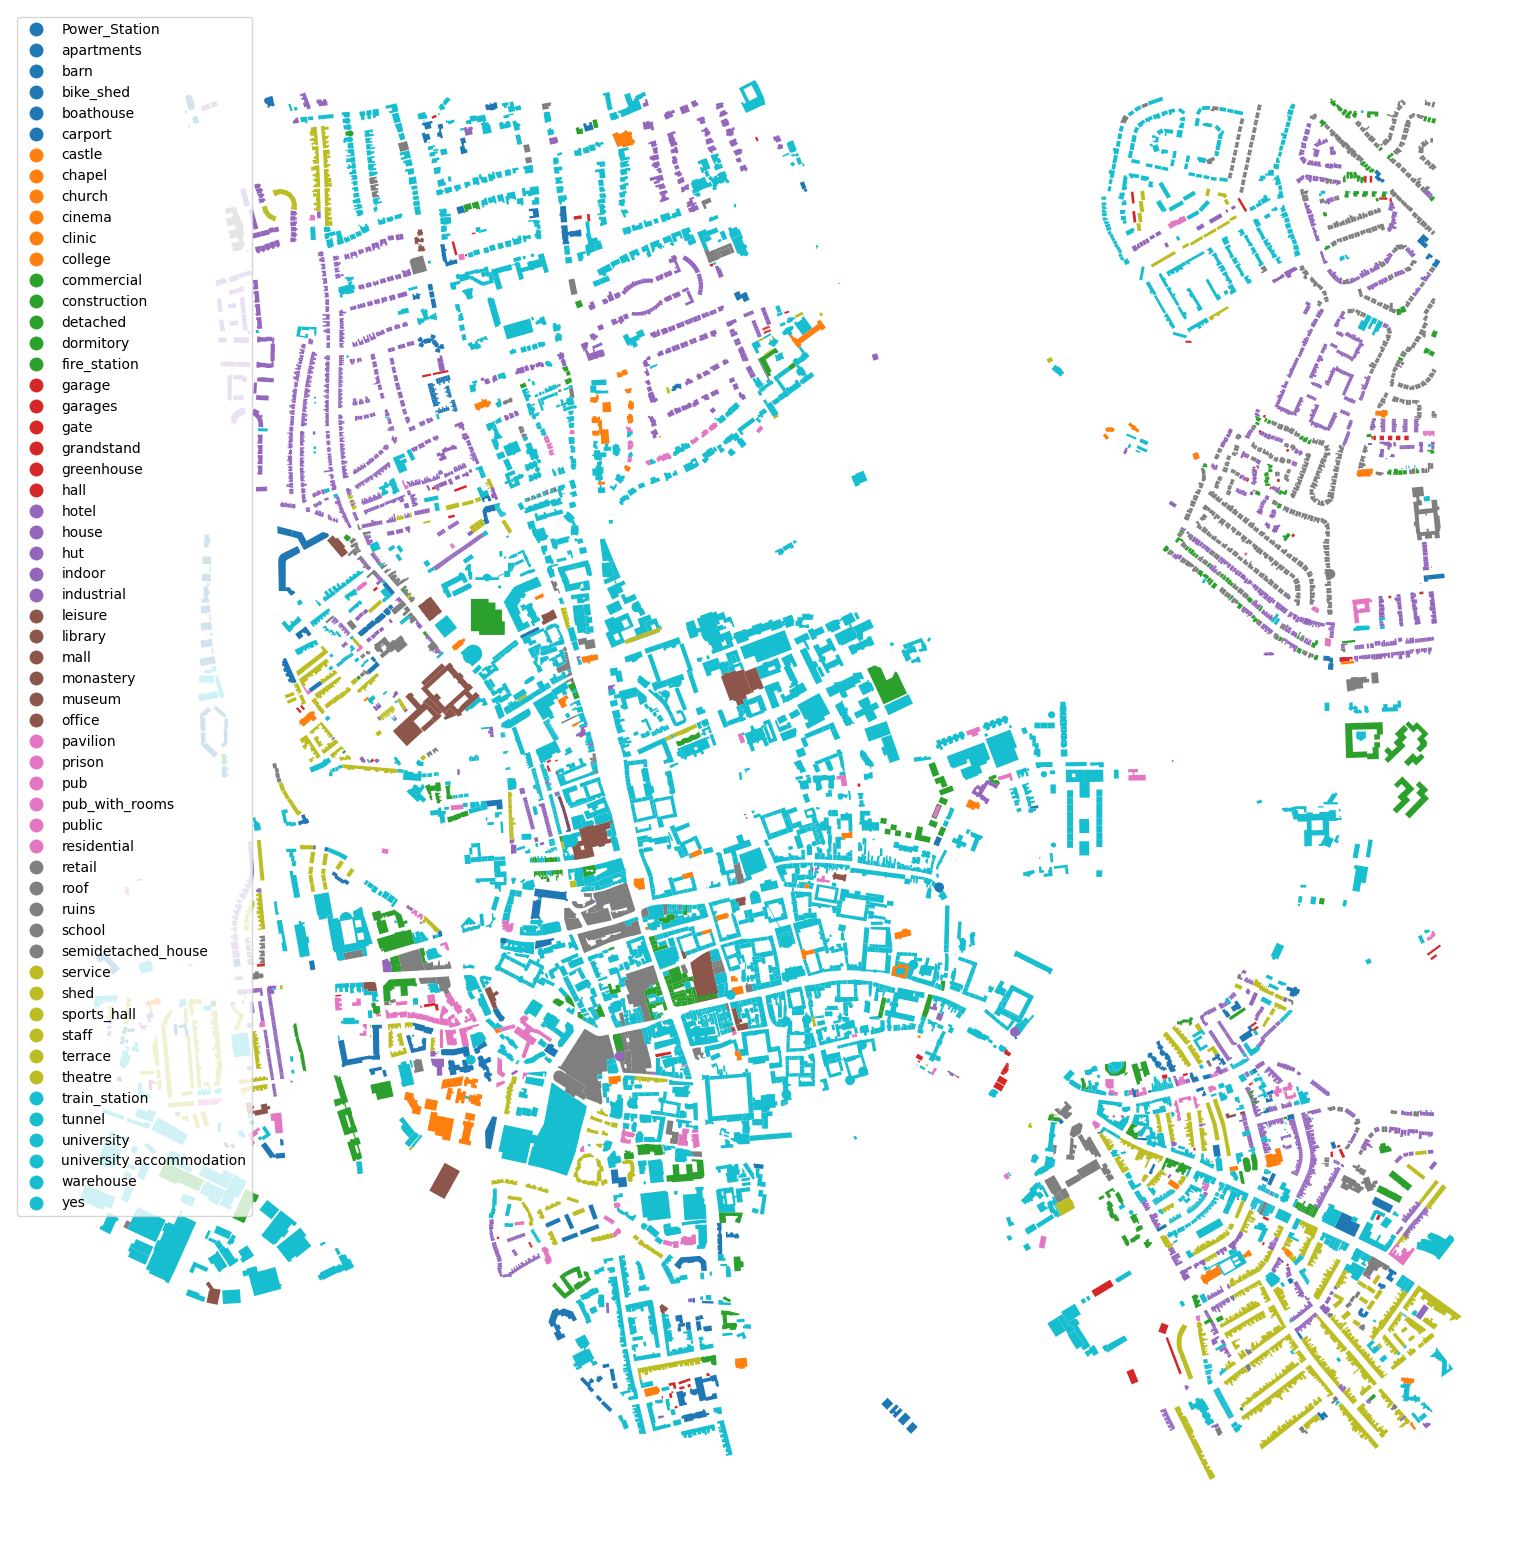

In [12]:
ax = buildings.plot(column='building', figsize=(20, 20), legend=True)
ax.set_axis_off()

#### **Step 5** Navigation & Routing

C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_18400\13562068.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Origin = amenities[amenities.name.str.contains("Railway Station", na=False)].geometry.centroid
C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_18400\13562068.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  destination_B =buildings[buildings.name.str.contains("Department of Statistics", na=False)].geometry.centroid
C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_18400\13562068.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

element_type  osmid   
way           5170077     POINT (-1.26932 51.75163)
              76138511    POINT (-1.26989 51.75399)
dtype: geometry
element_type  osmid   
way           46612531    POINT (-1.25958 51.75887)
              60557011    POINT (-1.25372 51.75806)
              60557023    POINT (-1.25413 51.75796)
dtype: geometry
364717
17126405


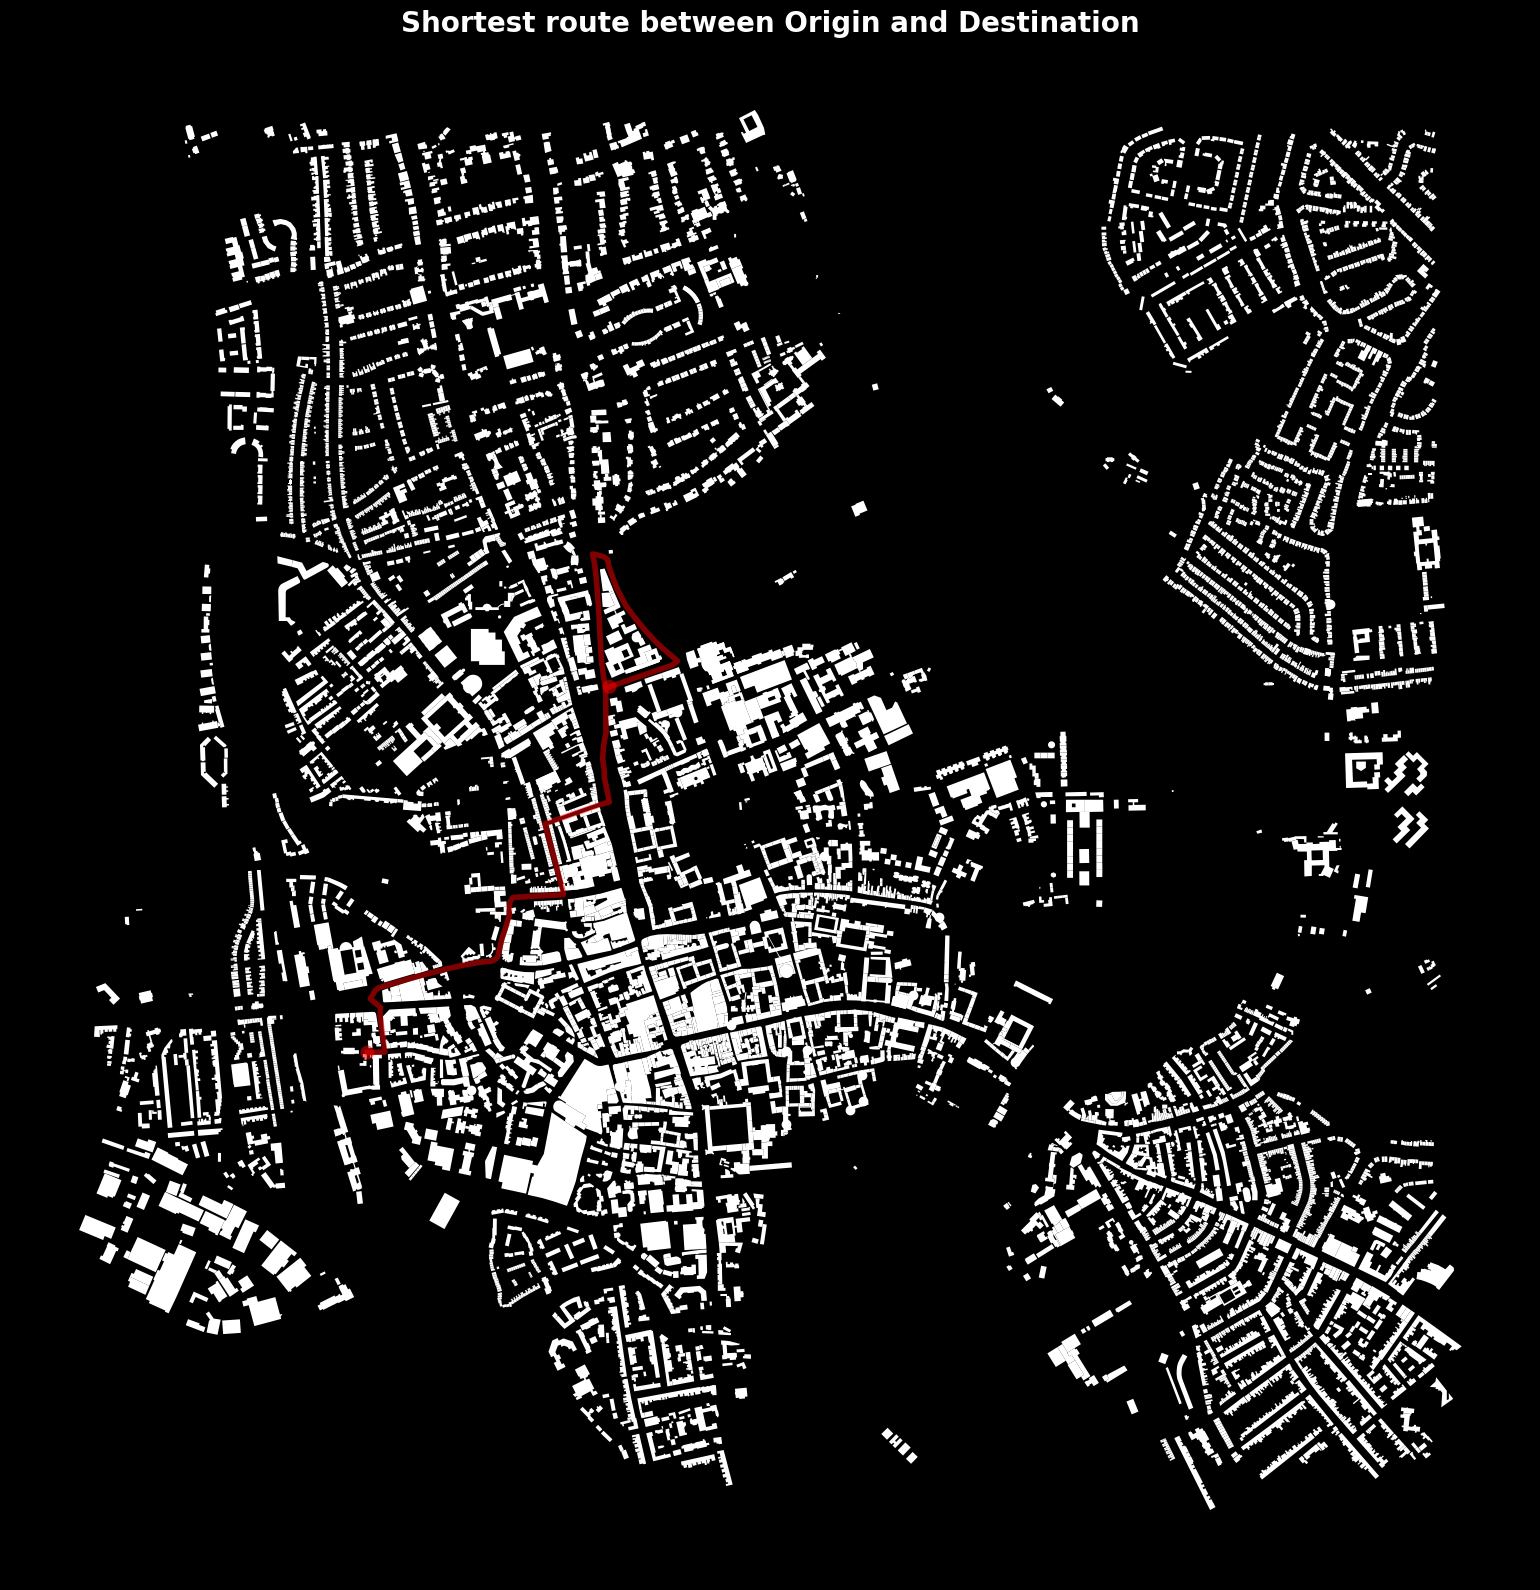

(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': 'Shortest route between Origin and Destination'}>)

In [13]:
Origin = amenities[amenities.name.str.contains("Railway Station", na=False)].geometry.centroid
destination_B =buildings[buildings.name.str.contains("Department of Statistics", na=False)].geometry.centroid
print(Origin)
print(destination_B)

# get the nearest node to the centroid of Department of Statistics
Origin = ox.nearest_nodes(G1, Origin.x[0], Origin.y[0])
print(Origin)
# get the nearest node to the centroid of Lloyd's of London
destination_B = ox.nearest_nodes(G1, destination_B.x[0], destination_B.y[0])
print(destination_B)

# get the shortest path between the two nodes
route = nx.shortest_path(G1, Origin, destination_B, weight='length')

# plot the route
fig, ax = plt.subplots(1, 1, figsize=(20, 20), facecolor='k', subplot_kw=dict(aspect='equal'))

# clean it up
ax.set_facecolor('k')
ax.set_axis_off()

# add a title
ax.set_title('Shortest route between Origin and Destination', fontsize=20, color='w', fontweight='bold')

buildings.plot(color='w', ax=ax)
ox.plot_graph_route(G1, route, node_size=2, ax=ax)

**Exercise**

Now that we have shown you how to build a query to Open Street Map using `custom_filter`, see if you can do one yourself for the city of your choosing.

1. Look at this [table](https://wiki.openstreetmap.org/wiki/Map_features) that shows the names of OSM features
2. Substitute some of those into the query above
4. Make sure do one query that gets amenities, like restaurants or cafes and do another for a class of road

Hit: points of interest, like amenities, come from `geometries_from_*` rather than `graph_from_*`. Use the "tags" field to choose what kinds of features you want to download in this function.

---

Something the may be important to your work will be distinguishing "motorway", "primary", "secondary", "tertiary" roads as well as downloading "footpath". Another thing that OSMnx can do is download amenities, which is important to spatial interaction modelling: amenities can take the place of population at destination when we try to model the attractiveness.




### 3 Percolation analysis
This section will apply percolation clustering analysis to the street network.

Percolation can be used to identify the clusters of areas that are connected within a certain distance threshold. The process consists of a series of thresholdings of the network, in which weak links get disconnected. For each threshold, different subgraphs emerged as the network starts to disconnect. The percolation threshold is the point at which the network transitions from a collection of isolated clusters to a single connected cluster.

#### **Step 1** Transform to A Undirected Graph

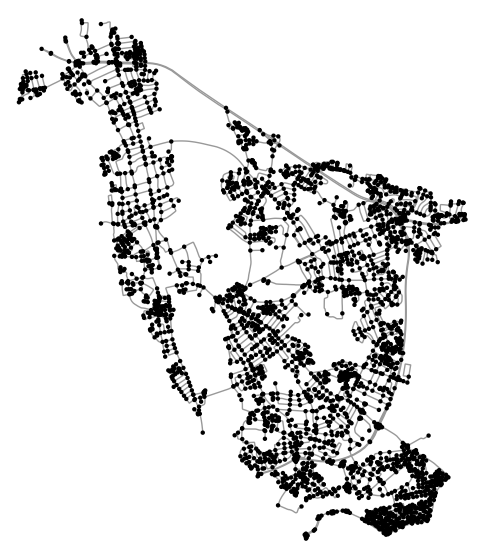

In [14]:
# convert your MultiDiGraph to an undirected MultiGraph
G2 = ox.convert.to_undirected(G1)

fig, ax = plt.subplots(figsize=(12,7))
fig, ax = ox.plot_graph(G2,
                        node_color='k',
                        node_size = 10,
                        ax=ax)

In [15]:
ox.basic_stats(G1)

{'n': 3422,
 'm': 7590,
 'k_avg': 4.436002337814144,
 'edge_length_total': 667039.414000002,
 'edge_length_avg': 87.88398076416364,
 'streets_per_node_avg': 2.3839859731151374,
 'streets_per_node_counts': {0: 0, 1: 1112, 2: 31, 3: 2132, 4: 147},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.3249561659848042,
  2: 0.009059029807130333,
  3: 0.6230274693161894,
  4: 0.042957334891876094},
 'intersection_count': 2310,
 'street_length_total': 361338.3610000006,
 'street_segment_count': 4065,
 'street_length_avg': 88.89012570725723,
 'circuity_avg': 1.0605517834795488,
 'self_loop_proportion': 0.004920049200492005}

In [16]:
ox.basic_stats(G2)

C:\Users\ALIENWARE\AppData\Roaming\Python\Python311\site-packages\osmnx\convert.py:381: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  dupes = edges[mask].dropna(subset=["geometry"])


{'n': 3422,
 'm': 4065,
 'k_avg': 2.375803623611923,
 'edge_length_total': 361338.3610000006,
 'edge_length_avg': 88.89012570725723,
 'streets_per_node_avg': 2.3839859731151374,
 'streets_per_node_counts': {0: 0, 1: 1112, 2: 31, 3: 2132, 4: 147},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.3249561659848042,
  2: 0.009059029807130333,
  3: 0.6230274693161894,
  4: 0.042957334891876094},
 'intersection_count': 2310,
 'street_length_total': 361338.3610000006,
 'street_segment_count': 4065,
 'street_length_avg': 88.89012570725723,
 'circuity_avg': 1.0605517834795488,
 'self_loop_proportion': 0.004920049200492005}

#### **Step 2** Check Edges & Nodes

In [17]:
# From Graph to GeoDataFrame
nodes, edges = ox.graph_to_gdfs(G2)
nodes

y         x  street_count        bc highway  \
osmid                                                              
213309       51.762899 -1.180401             3  0.000292     NaN   
213313       51.762403 -1.191741             3  0.006217     NaN   
213315       51.762825 -1.195089             3  0.005171     NaN   
213318       51.763100 -1.196393             3  0.066158     NaN   
213319       51.762770 -1.196465             3  0.058669     NaN   
...                ...       ...           ...       ...     ...   
11868535406  51.751680 -1.237404             3  0.125532     NaN   
11871616420  51.764161 -1.196009             1  0.000000     NaN   
11935823423  51.769350 -1.208596             3  0.001162     NaN   
11935835319  51.763794 -1.204672             1  0.000000     NaN   
12003627514  51.760092 -1.198712             1  0.000000     NaN   

                              geometry  
osmid                                   
213309       POINT (-1.18040 51.76290)  
213313       POINT (-1.19174 51.76240)  
213315       POINT (-1.19509 51.76282)  
213318       POINT (-1.19639 51.76310)  
213319       POINT (-1.19647 51.76277)  
...                                ...  
11868535406  POINT (-1.23740 51.75168)  
11871616420  POINT (-1.19601 51.76416)  
11935823423  POINT (-1.20860 51.76935)  
11935835319  POINT (-1.20467 51.76379)  
12003627514  POINT (-1.19871 51.76009)  

[3422 rows x 6 columns]

In [18]:
edges

osmid  oneway   lanes   ref  \
u           v           key                                                   
213309      8399368007  0                   148359466    True       2   A40   
            10069541058 0                   904416096    True     NaN   NaN   
            8399367992  0                   148359466    True       2   A40   
213313      185420032   0                    37728512   False     NaN   NaN   
            213315      0      [37728513, 1136744506]    True  [3, 4]   A40   
...                                               ...     ...     ...   ...   
11751666882 11751666888 0                   148463360    True       2   A44   
                        1    [1264990435, 1264990436]    True       1   NaN   
11862527048 11935823423 0    [1277858121, 1277858124]   False     NaN   NaN   
11863259795 11935823423 0    [1277858121, 1277937783]   False     NaN   NaN   
11868535405 11868535406 0                  1278435463    True       2  A420   

                                        name       highway maxspeed reversed  \
u           v           key                                                    
213309      8399368007  0        London Road         trunk   50 mph    False   
            10069541058 0                NaN    trunk_link   50 mph    False   
            8399367992  0        London Road         trunk   50 mph    False   
213313      185420032   0    Collinwood Road   residential   20 mph    False   
            213315      0        London Road         trunk   30 mph    False   
...                                      ...           ...      ...      ...   
11751666882 11751666888 0     Woodstock Road         trunk   70 mph    False   
                        1                NaN  unclassified      NaN    False   
11862527048 11935823423 0     Boyce Crescent   residential   20 mph     True   
11863259795 11935823423 0     Boyce Crescent   residential   20 mph    False   
11868535405 11868535406 0       London Place       primary   20 mph    False   

                              length  \
u           v           key            
213309      8399368007  0     99.218   
            10069541058 0    112.399   
            8399367992  0     37.597   
213313      185420032   0     21.860   
            213315      0    235.689   
...                              ...   
11751666882 11751666888 0     26.167   
                        1     89.179   
11862527048 11935823423 0    100.034   
11863259795 11935823423 0      8.910   
11868535405 11868535406 0     36.458   

                                                                      geometry  \
u           v           key                                                      
213309      8399368007  0    LINESTRING (-1.18040 51.76290, -1.18171 51.762...   
            10069541058 0    LINESTRING (-1.18040 51.76290, -1.18071 51.762...   
            8399367992  0    LINESTRING (-1.17987 51.76298, -1.18040 51.76290)   
213313      185420032   0    LINESTRING (-1.19178 51.76221, -1.19174 51.76240)   
            213315      0    LINESTRING (-1.19174 51.76240, -1.19309 51.762...   
...                                                                        ...   
11751666882 11751666888 0    LINESTRING (-1.28354 51.79157, -1.28366 51.79179)   
                        1    LINESTRING (-1.28354 51.79157, -1.28369 51.791...   
11862527048 11935823423 0    LINESTRING (-1.20860 51.76935, -1.20866 51.769...   
11863259795 11935823423 0    LINESTRING (-1.20860 51.76935, -1.20855 51.769...   
11868535405 11868535406 0    LINESTRING (-1.23699 51.75188, -1.23711 51.751...   

                                    from           to junction access width  \
u           v           key                                                   
213309      8399368007  0         213309   8399368007      NaN    NaN   NaN   
            10069541058 0         213309  10069541058      NaN    NaN   NaN   
            8399367992  0     8399367992       213309      NaN    NaN   NaN

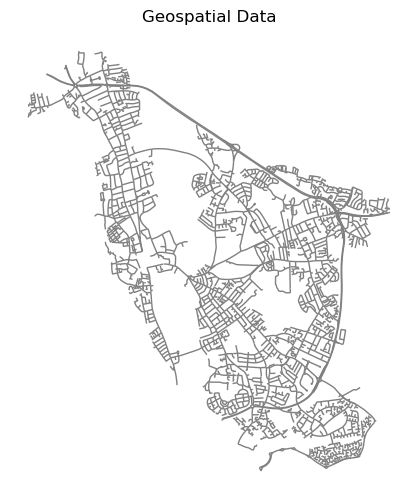

In [19]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# You can customize the plot with different options
edges.plot(ax=ax, color='grey', linewidth=1, edgecolor='black')

# Optionally, you can add titles and labels
ax.set_title('Geospatial Data')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_axis_off()

# Show the plot
plt.show()

In [20]:
#get a simplified node list
data_coords = nodes[["x","y"]]
data_coords['id_point'] = data_coords.index
data_coords

C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_18400\1102546560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coords['id_point'] = data_coords.index


x          y     id_point
osmid                                        
213309      -1.180401  51.762899       213309
213313      -1.191741  51.762403       213313
213315      -1.195089  51.762825       213315
213318      -1.196393  51.763100       213318
213319      -1.196465  51.762770       213319
...               ...        ...          ...
11868535406 -1.237404  51.751680  11868535406
11871616420 -1.196009  51.764161  11871616420
11935823423 -1.208596  51.769350  11935823423
11935835319 -1.204672  51.763794  11935835319
12003627514 -1.198712  51.760092  12003627514

[3422 rows x 3 columns]

#### **Step 3** Percolation
The process consists of a series of thresholds of the network. Through setting different distance thresholds, different subgraphs emerged as the network starts to disconnect.

Note that the thresholds are NOT universal. Also that the networks from the OMS are incomplete, hence more detail, referring to smaller streets being present, will only be given in cities where the effort to map those streets has been put into it. Hence, different distances will be found for the transitions in different cities.

First let us define the vector containing the percolation thresholds of interest

In [21]:
rmin = 10  #10 metres as the starting distance threshold
rmax = 1001 #1000 metres as the ending threshod
r0 = np.arange(rmin, rmax, 10)
n_loops = len(r0)

file_clust_size = 'cluster_size.txt'
with open(file_clust_size, 'w') as file:
    file.write('threshold\t size\n')

Define the thresholds to plot the 10 largest clusters on maps

In [22]:
jumps_2plot = [90,160,200,210,260,290,330]

In [23]:
# Define the colors for the top 10 clusters
top10 = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'cyan', 'magenta', 'brown']

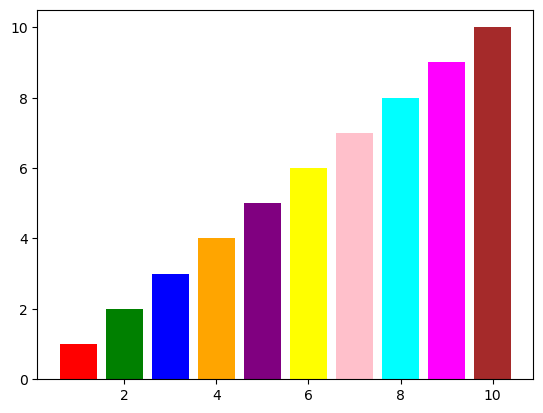

In [24]:
# Visualize the colors
plt.bar(range(1, 11), range(1, 11), color=top10)
plt.show()

In [25]:
# Obtain the node counts of the network
size_net = G2.number_of_nodes()
size_net


3422

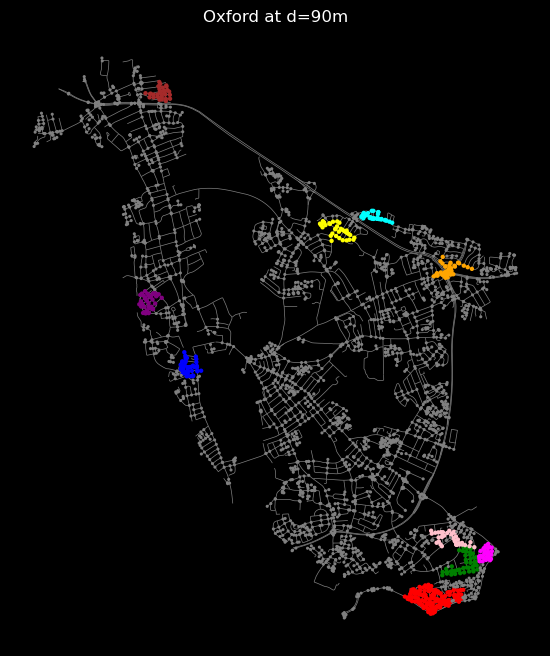

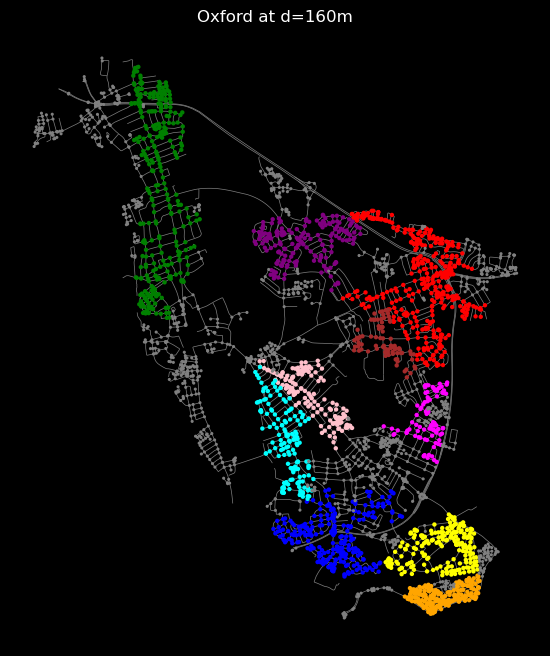

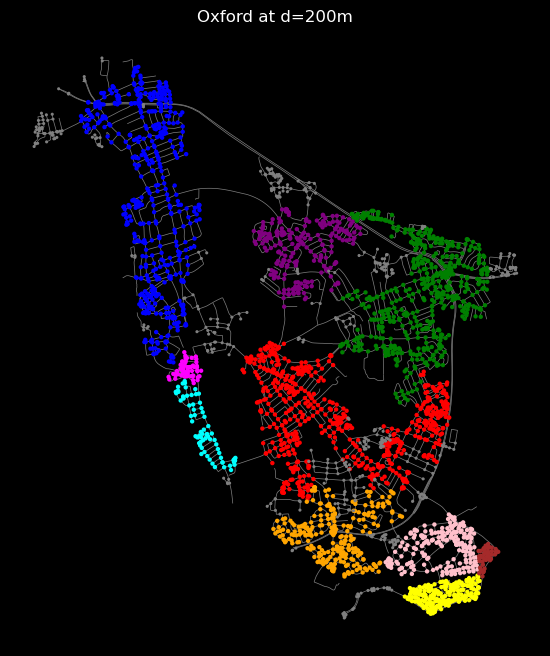

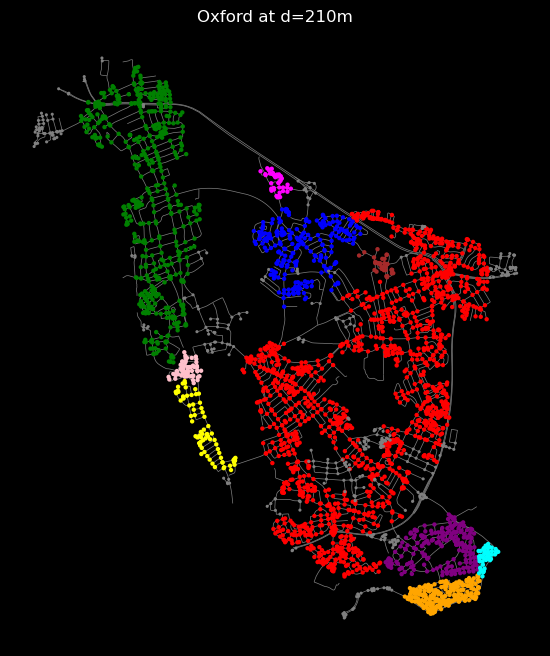

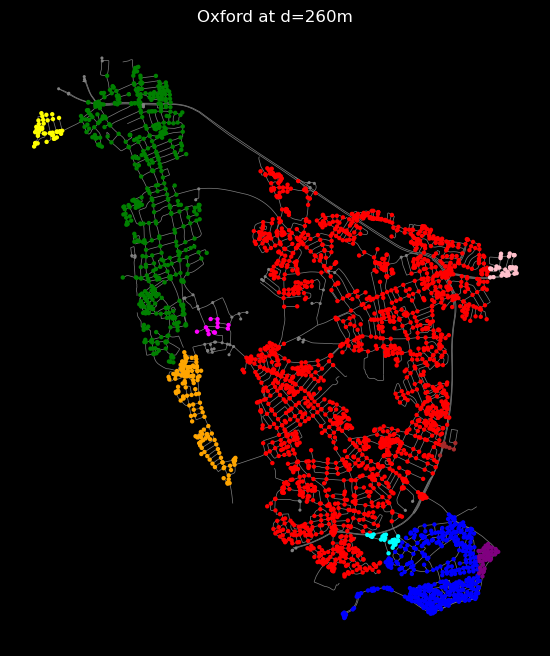

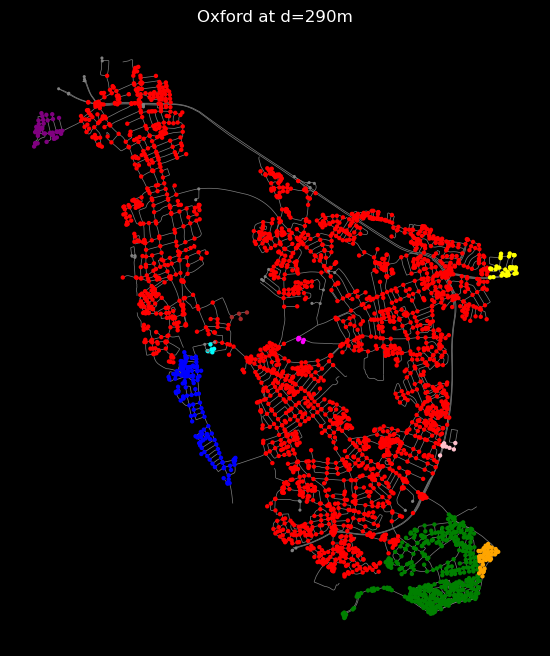

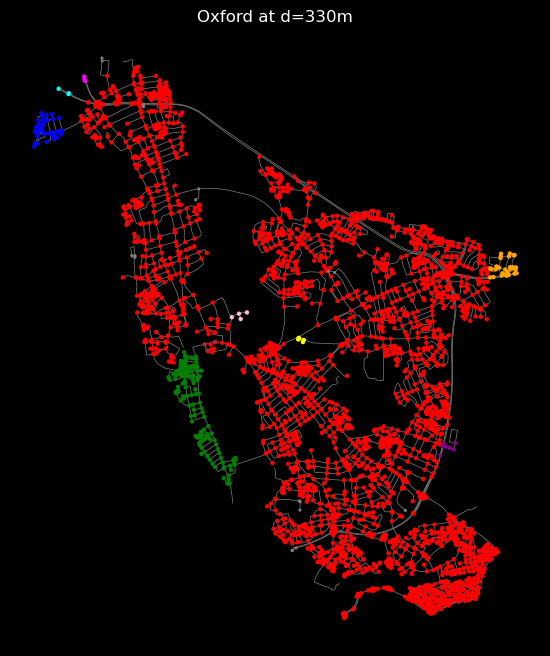

In [26]:
#Percolation process & plot
for i_t in r0:
    # Find subgraph such that all weights <= threshold r0
    edges_1 = [(u, v, d) for u, v, d in G2.edges(data=True) if d['length'] <= i_t]
    g = nx.Graph()
    g.add_edges_from(edges_1)
    g.remove_nodes_from(list(nx.isolates(g)))

    # Take subcomponents
    membclusters = {node: cid for cid, component in enumerate(nx.connected_components(g)) for node in component}

    m = pd.DataFrame(list(membclusters.items()), columns=["id_point", "id_cluster"])

    table_data = m['id_cluster'].value_counts()

    # Largest connected component
    LCC = table_data.max()
    LCC_p = LCC / size_net
    v_LCC = [i_t, LCC, LCC_p]

    if i_t == rmin:
        v_LCC_t = np.array([v_LCC])
    else:
        v_LCC_t = np.vstack([v_LCC_t, v_LCC])

    sorted_table = table_data.sort_values(ascending=False)

    if i_t in jumps_2plot:

        # Assign colours
        list_clusts = sorted_table.reset_index()
        list_clusts.columns = ["id_cluster", "n_points"]
        list_clusts['colour'] = 'grey'
        list_clusts.loc[:9, 'colour'] = top10
        list_clusts['size'] = 0.1
        list_clusts.loc[:9, 'size'] = 0.2

        total_list = pd.merge(list_clusts, m, on="id_cluster")

        points_coords_cols = pd.merge(total_list, data_coords, on="id_point")


        # # Plot the original street network system  as background
        # fig, ax = plt.subplots(1, 1, figsize=(10, 8),facecolor='black')
        # edges.plot(ax=ax, color='grey', edgecolor='black')

        # # plt.savefig(file_map, height=850, width=1000)
        # plt.figure(figsize=(10, 8), facecolor='black')
        # plt.scatter(points_coords_cols['x'], points_coords_cols['y'], s=points_coords_cols['size'] * 50, c=points_coords_cols['colour'], edgecolor='none')
        # plt.title(f"Oxford at d={i_t}m", color='white')
        # plt.axis('off')
        # plt.show()
        # # plt.savefig(file_map)
        # # plt.close()

        # Plot the original street network system as background
        fig, ax = plt.subplots(1, 1, figsize=(10, 8), facecolor='black')


        # Plot points
        ax.scatter(points_coords_cols['x'], points_coords_cols['y'], s=points_coords_cols['size'] * 50, c=points_coords_cols['colour'], edgecolor='none',zorder = 1)

         # Plot edges geometry as background
        edges.plot(ax=ax, color='grey', linewidth=0.5, zorder = 0)

        ax.set_title(f"Oxford at d={i_t}m", color='white')
        ax.axis('off')

        plt.show()


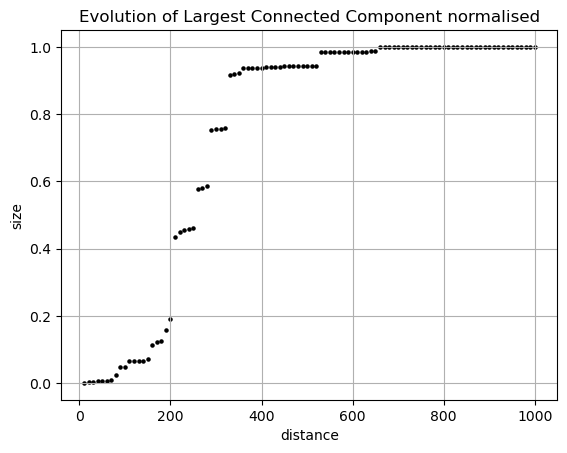

In [27]:
import matplotlib.pyplot as plt

plt.figure(facecolor='white')

plt.scatter(v_LCC_t[:, 0], v_LCC_t[:, 2], c='black', s=5)
plt.grid(True)

plt.xlabel("distance")
plt.ylabel("size")
plt.title("Evolution of Largest Connected Component normalised")

plt.show()


## Part II Accessibility Modelling using R5Py

This part of the tutorial will introduce you to the R5Py library, which is a Python wrapper for the R5 routing engine. R5 is a multimodal routing engine that can be used to calculate travel times between locations in a city using different modes of transport, such as walking, cycling, and public transport. It is open-source, efficient and use real-time data and OpenStreetMap to provide accurate travel time estimates.

In this tutorial, we will use R5Py to calculate the travel time matrix between different locations in Oxford and analyze the accessibility of urban amenities in the city.

### Setup
First, we need to clone the repository that contains the data and code for this section tutorial.They can be directly fetched from seprated sources, but here we have already prepared them for you.

The repository contains the following folders:
- `/r5`: Contains the files needed to set up the R5Py, including the Openstreetmap (OSM PBF) file and the Transit Feed (GTFS) file for Oxford.
- `/spatial`: Contains the spatial data for Oxford, including the boundary of the city, the locations of the amenities, and the population grids.
- `/results`: Contains the pre-calculated travel time matrix between the population grids and the amenities in Oxford. Since in beta stage, we found calculating the time matrix cost too much time on Colab. It is prepared to expediate the process.

In [28]:
!git clone https://github.com/xnzhang-33/OSSEN-Workshop

'git' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
D:\Anaconda\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
D:\Anaconda\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
D:\Anaconda\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)


Then, we will increase the memory available to the notebook to allow for the computation of the travel time matrix. This is important as the computation of the travel time matrix can be memory-intensive, especially for large networks.

In [29]:
# Allow 12 GB of memory
import sys
sys.argv.append(["--max-memory", "12G"])

In [ ]:
#### Import the necessary libraries ####

# R5Py for travel time matrix computation
from r5py import TransportNetwork, TravelTimeMatrixComputer

# GeoPandas for spatial data manipulation
import geopandas as gpd
import pandas as pd

# General library
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [ ]:
wd = 'OSSEN-Workshop/'

# Import spatial boundaries of Oxford for context; they are obtained from ONS as open geo-boundary data
ox_bound = gpd.read_file(wd + 'spatial/oxford_boundary.geojson').to_crs(epsg=4326)

In [ ]:
# Create the origins and destinations GeoDataFrame for calculating the travel time matrix

# Origins: Population grids in Oxford
# The dataset are retrieved from WorldPop as Contrained and Adjusted Population in 2020
# (https://www.worldpop.org/geodata/summary?id=24777)
origins = gpd.read_file(wd + 'spatial/oxford_points.geojson')

# Destinations: Amenities in Oxford; for University, it contains all the university buildings; for food, it contains all the food outlets.
# Both datasets were retrieved from OpenStreetMap
destinations_university = gpd.read_file(wd + 'spatial/oxford_university_buildings_centroids.geojson')
destinations_food = gpd.read_file(wd + 'spatial/oxford_food.geojson')

In [ ]:
# Check the first few rows of the origins datasets
origins.head()

In [ ]:
# Check the first few rows of the destinations datasets
destinations_university.head()

In [ ]:
# Plot the features for better understanding
origins.explore(column='VALUE', scheme='natural_breaks',cmap="plasma")

In [ ]:
# You can use .explore() to interactively explore the data or .plot() to plot the data
# destinations_university.plot()
destinations_university.explore()

In [ ]:
destinations_food.explore()
# destinations_food.plot()

### Time matrix and accessibility

To start with the accessibility analysis, we would like to make the simplist case: How long it would take from one certain place to travel to another?

In [ ]:
###### Create a TransportNetwork object in R5Py using the OSM data ######
# This provides a basis for analysis in the entire third section
transport_network = TransportNetwork(
    osm_pbf=wd + 'r5/oxfordshire-latest.osm.pbf', # Path to the OSM PBF file
    gtfs=[wd + 'r5/oxfordbus_1718780465.zip'] # Path to the GTFS file
)

In [ ]:
# Select one point as origin, you can choose any point in the origins dataset

# Some good example could include:
# 1308 - The city center
# 2058 - Department of Stats Building
# 1319 - Lady Margaret Hall

origin = origins.loc[origins['id'] == 1308]

In [ ]:
# Create a TravelTimeMatrixComputer object using R5Py to calculate travel times

# This is a key step as it will determine the travel times between all pairs of origins and destinations in the network
travel_time_computer_point = TravelTimeMatrixComputer(
    transport_network=transport_network,
    origins=origin,
    destinations=origins,
    snap_to_network=True,
    # Below are some of the travel options that can be tweaked as needed
    transport_modes=['WALK','BICYCLE', 'TRANSIT'], # Modes of transport to consider, e.g., 'WALK', 'BICYCLE', 'CAR', 'TRANSIT'
    # speed_walking=3.6,
)

# For more information on the available options, please refer to the R5Py documentation: https://r5py.readthedocs.io/en/latest/

In [ ]:
# Compute travel times between all origins and destinations;
od_matrix_point = travel_time_computer_point.compute_travel_times()

In [ ]:
od_matrix_point.head()
# The calculated time_matrix is vey simple: you have the starting id, and its time of travel to any other location (id).

In [ ]:
join_point = origins.merge(od_matrix_point, left_on="id", right_on="to_id")
join_point.head()
# You can see how the aggregated data look like. A geometry is introduced to spatially plot the accessibility.

In [ ]:
# Build a plot to show the travel times
fig, ax = plt.subplots(figsize=(10,8))  # Adjust size as needed

# Plot the boundary for context
ox_bound.plot(ax=ax, color='none', scheme='natural_breaks', linewidth=1)
join_point.plot(ax=ax,column="travel_time", cmap="cividis_r",scheme = 'natural_breaks', markersize=2,linewidth=1,legend=True)
origin.plot(ax=ax, color='red', markersize=10,legend=True)

ax.set_title("Travel time from selected point to all destinations combining public transport and active travel")
ax.set_axis_off()

**Q1: What if we are only do it for active travel modes (i.e., walking)?**

We can achieve this by tweaking the travel mode in TravelTimeMatrixComputer. You can give it a try in the following code blocks.

In [ ]:
travel_time_computer_point_walk = TravelTimeMatrixComputer(
####### Make your answers here to set up the time matrix computer #######
)

# Compute travel times between all origins and destinations
od_matrix_point_walk = travel_time_computer_point_walk.compute_travel_times()

# Create the combined matrix
join_point = origins.merge(od_matrix_point_walk, left_on="id", right_on="to_id")
join_point.head()

In [ ]:
join_point.explore(column="travel_time", scheme='natural_breaks',cmap="cividis_r")

In [ ]:
# Or, You can use this part to plot the result
fig, ax = plt.subplots(figsize=(10,8))  # Adjust size as needed

# Change the following line to your own variable.
# join_point.plot(ax=ax,column="travel_time", cmap="cividis_r",markersize=2,linewidth=1,legend=True)

origin.plot(ax=ax, color='red', markersize=10, scheme='natural_breaks', legend=True)
ox_bound.plot(ax=ax, color='none',linewidth=1)

ax.set_title("Travel time from selected point to all destinations with only walking")
ax.set_axis_off()

### Opportunities accessible within a certain travel time
It is important to understand the accessibility of urban amenities, such as food outlets, schools, and healthcare facilities, to different parts of the city. This information can help urban planners and policymakers identify areas with limited access to essential services and improve the overall accessibility of the city.

Similar case can be made for the accessibility of opportunities, such as jobs and schools. This section will be using the Oxford dataset to demonstrate how to calculate the accessibility of food outlets in the city using R5Py.

In this case, we will calculate the number of food outlets accessible within 25 minutes of sustainable travel (walking, cycling and public transport) from each population grid in Oxford.

In [ ]:
travel_time_computer = TravelTimeMatrixComputer(
    transport_network=transport_network,
    origins=origins,
    destinations=destinations_food, #Here we use all the functions that serves food
    #snap_to_network=True,
    transport_modes=['WALK','BICYCLE', 'TRANSIT'],
)

In [ ]:
od_matrix = travel_time_computer.compute_travel_times()

# Normally we should compute the calculation using colab, but in the beta stage,
# the time it took is too long. So we have referred to a pre-calculated matrix
# for the travel time data. They are the same though!

In [ ]:
# If you are finding the previous block taking more than 3mins to run, you can
# uncomment the following block to load the pre-calculated matrix.

# od_matrix = pd.read_csv(wd+'results/od_matrix.csv')

In [ ]:
time_threshold = 25

# Filter the OD matrix to include only travel times less than or equal to 25 minutes
filtered_matrix = od_matrix[od_matrix['travel_time'] <= time_threshold]

# Count the number of accessible POIs for each population grid
accessible_pois = filtered_matrix.groupby('from_id').size().reset_index(name='access_foods')

# Merge the accessibility information with the origins GeoDataFrame for plotting
join = origins.merge(accessible_pois, left_on="id", right_on="from_id")

In [ ]:
# Build a plot to show the accessible opportunities
fig, ax = plt.subplots(figsize=(10,8))  # Adjust size as needed

# Plot the Oxford County boundary for context
ox_bound.plot(ax=ax, color='none', scheme='natural_breaks', linewidth=1)

# Plot the number of accessible food outlets aggregated in the above block
join.plot(ax=ax,column="access_foods", scheme='natural_breaks',cmap="plasma",markersize=2,linewidth=1, legend=True)

ax.set_title(f"Number of Food Outlets Accessible Under {time_threshold} Minutes")
ax.set_axis_off()

In [ ]:
# Or instead, you can use explore for an interactive plot.
join.explore(column="access_foods", scheme='natural_breaks',cmap="plasma")

**Q2: Use the `destinations_university` dataset we defined earlier, try to calculate the accessible Oxford University Buildings under 20 minutes walk.**

Or if you are more familiar with spatial data manipulation, try and see what more insights you can extract using this data. For example, you can try and see how for does every place need to go to reach a food stall.

Note: As both dataset contains ~1000 entries, the calculation would involve 10^6 entries of time matrix, so it would probably take a while!

In [ ]:
# You can use the following part of the notebook for answering the question.